In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("exp_wk_44_48.csv")

In [4]:
df = df.fillna(0)
df.head()

,city3,wk,car_numb,total_ob,incentive_without_penalty,city_login
0,hyderabad,47,TS01UA2411,719.91,0.00,10.768889
1,hyderabad,44,TS01UA6452,14326.65,859.71,79.105000
2,hyderabad,48,TS01UB4891,5876.15,474.01,36.320000
3,hyderabad,45,TS01UB6795,16216.37,240.41,70.632222
4,hyderabad,44,TS02UA9216,7539.89,1390.45,41.667500


In [5]:
df = df.drop("city3",axis=1)
df["eph"] = (df["total_ob"]+df["incentive_without_penalty"])/df["city_login"]

In [6]:
df.loc[df.eph == float('inf'), 'eph'] = 0

In [7]:
wk44 = df[df.wk == 44]
wk45 = df[df.wk == 45]
wk46 = df[df.wk == 46]
wk47 = df[df.wk == 47]
wk48 = df[df.wk == 48]

In [8]:
wk44 = wk44.sort_values(by=['car_numb'],ascending=[True])
wk45 = wk45.sort_values(by=['car_numb'],ascending=[True])
wk46 = wk46.sort_values(by=['car_numb'],ascending=[True])
wk47 = wk47.sort_values(by=['car_numb'],ascending=[True])
wk48 = wk48.sort_values(by=['car_numb'],ascending=[True])

In [9]:
l = []
for i in range(1,1515):
    l.append(i)
wk44["index"] = l
wk45["index"] = l
wk46["index"] = l
wk47["index"] = l
wk48["index"] = l

In [10]:
wk44.set_index("index",inplace=True)
wk45.set_index("index",inplace=True)
wk46.set_index("index",inplace=True)
wk47.set_index("index",inplace=True)
wk48.set_index("index",inplace=True)

In [11]:
wk44["wk45login"] = wk45["city_login"]
wk45["wk46login"] = wk46["city_login"]
wk46["wk47login"] = wk47["city_login"]
wk47["wk48login"] = wk48["city_login"]

In [12]:
wk44["changep"] = ((wk44['wk45login']-wk44['city_login'])/wk44['city_login']) * 100
wk45["changep"] = ((wk45['wk46login']-wk45['city_login'])/wk45['city_login']) * 100
wk46["changep"] = ((wk46['wk47login']-wk46['city_login'])/wk46['city_login']) * 100
wk47["changep"] = ((wk47['wk48login']-wk47['city_login'])/wk47['city_login']) * 100

In [13]:
wk44.drop(["wk","wk45login"], axis=1, inplace=True)
wk45.drop(["wk","wk46login"], axis=1, inplace=True)
wk46.drop(["wk","wk47login"], axis=1, inplace=True)
wk47.drop(["wk","wk48login"], axis=1, inplace=True)

In [14]:
wk44 = wk44[wk44.city_login !=0]
wk45 = wk45[wk45.city_login !=0]
wk46 = wk46[wk46.city_login !=0]
wk47 = wk47[wk47.city_login !=0]

In [15]:
wk46.head()

,car_numb,total_ob,incentive_without_penalty,city_login,eph,changep
index,,,,,,
1,TS01UA2411,6395.70,0.00,31.358333,203.955355,-65.658606
2,TS01UA4308,4105.47,60.29,23.676944,175.941622,13.254807
3,TS01UA4945,262.63,0.00,12.003889,21.878743,5.333920
4,TS01UA6452,13535.50,1288.20,67.733611,218.852941,-32.632740
5,TS01UA7585,1943.76,334.40,42.693611,53.360677,-32.845143


In [16]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest()

In [17]:
clf.fit(wk46.drop(["car_numb","city_login","eph"],axis=1))
y = clf.predict(wk46.drop(["car_numb","city_login","eph"],axis=1))

In [18]:
wk46["outliers"] = y

In [19]:
wk46[wk46.outliers != -1].describe()

,total_ob,incentive_without_penalty,city_login,eph,changep,outliers
count,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.0
mean,6273.123196,730.358099,37.119480,185.590824,27.392274,1.0
std,4422.565240,1199.104405,24.821122,77.186930,103.789186,0.0
min,69.890000,-974.448000,0.380000,3.604105,-95.006593,1.0
25%,2448.320000,0.000000,16.035556,143.201438,-30.143384,1.0
50%,5355.720000,0.000000,33.985833,190.477227,0.252614,1.0
75%,9577.580000,990.000000,55.132778,228.237045,46.308456,1.0
max,18063.460000,5527.540000,130.096111,1689.894737,751.896357,1.0


In [20]:
clf.fit(wk47.drop(["car_numb","city_login","eph"],axis=1))
y = clf.predict(wk47.drop(["car_numb","city_login","eph"],axis=1))

In [21]:
wk47["outliers"] = y
wk47[wk47.outliers != -1].describe()

,total_ob,incentive_without_penalty,city_login,eph,changep,outliers
count,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.0
mean,6234.235452,691.200698,37.692621,183.062800,19.562991,1.0
std,4327.456799,1045.390542,24.356140,66.771903,86.166807,0.0
min,67.060000,-500.000000,0.436389,1.983783,-95.812487,1.0
25%,2514.770000,0.000000,17.169444,138.528055,-31.153656,1.0
50%,5490.070000,63.950000,34.346667,187.727842,0.481138,1.0
75%,9270.330000,1075.970000,53.949444,227.381804,43.864880,1.0
max,18580.800000,4780.000000,141.734444,573.501378,527.695898,1.0


In [22]:
wk46_without_outliers = wk46[wk46.outliers != -1]

In [23]:
from sklearn.cluster import KMeans

In [24]:
kmeans = KMeans(n_clusters=2)

In [25]:
kmeans.fit(wk46_without_outliers.drop(["car_numb","city_login","eph","outliers"],axis=1).values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [26]:
wk46_without_outliers["category"] = kmeans.labels_

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


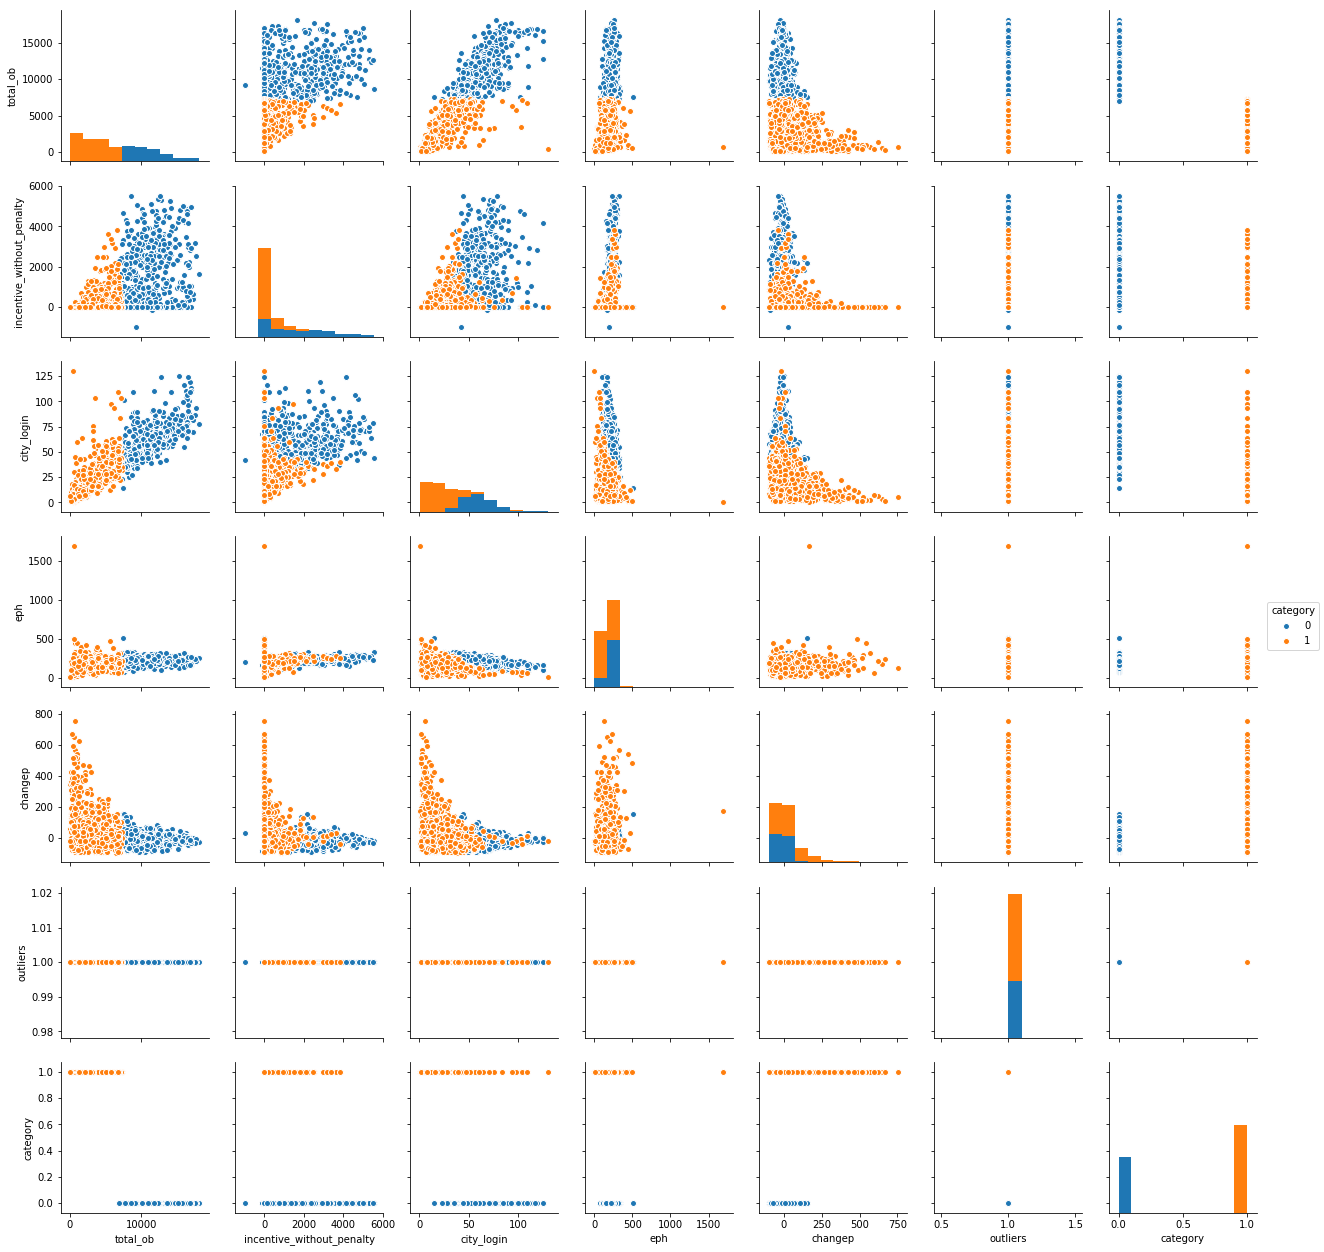

In [27]:
sns.pairplot(wk46_without_outliers,hue="category")

In [28]:
wk46_without_outliers["category"] = wk46_without_outliers["category"].map({0:"OB_based",1:"incentives_based"})

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [30]:
l = []
for i in range(1,1362):
    l.append(True)
wk46_without_outliers["status"] = l
wk46_without_outliers.loc[wk46_without_outliers["changep"]<=-20,"status"] = False

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [31]:
wk46_without_outliers.head()

,car_numb,total_ob,incentive_without_penalty,city_login,eph,changep,outliers,category,status
index,,,,,,,,,
1,TS01UA2411,6395.70,0.00,31.358333,203.955355,-65.658606,1,incentives_based,False
2,TS01UA4308,4105.47,60.29,23.676944,175.941622,13.254807,1,incentives_based,True
3,TS01UA4945,262.63,0.00,12.003889,21.878743,5.333920,1,incentives_based,True
4,TS01UA6452,13535.50,1288.20,67.733611,218.852941,-32.632740,1,OB_based,False
5,TS01UA7585,1943.76,334.40,42.693611,53.360677,-32.845143,1,incentives_based,False


In [32]:
from sklearn.model_selection import train_test_split
X = wk46_without_outliers.drop(["car_numb","eph","changep","outliers","category","status"],axis = 1)
y = wk46_without_outliers["status"]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [34]:
predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

      False       0.33      0.35      0.34       188
       True       0.65      0.63      0.64       357

avg / total       0.54      0.53      0.54       545



In [35]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print(classification_report(y_test,rfc_pred))

             precision    recall  f1-score   support

      False       0.38      0.21      0.27       188
       True       0.66      0.82      0.73       357

avg / total       0.57      0.61      0.57       545



In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

      False       0.33      0.29      0.31       188
       True       0.65      0.69      0.67       357

avg / total       0.54      0.55      0.54       545



In [37]:
error_rate = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0,0.5,'Error Rate')

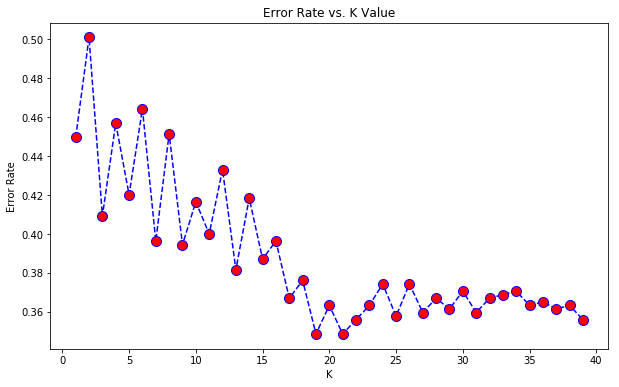

In [38]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [39]:
knn = KNeighborsClassifier(n_neighbors=33)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

      False       0.26      0.04      0.07       188
       True       0.65      0.94      0.77       357

avg / total       0.52      0.63      0.53       545



In [40]:
wk46_without_outliers.drop(["category","status"],axis=1,inplace=True)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [41]:
wk46_without_outliers.head()

,car_numb,total_ob,incentive_without_penalty,city_login,eph,changep,outliers
index,,,,,,,
1,TS01UA2411,6395.70,0.00,31.358333,203.955355,-65.658606,1
2,TS01UA4308,4105.47,60.29,23.676944,175.941622,13.254807,1
3,TS01UA4945,262.63,0.00,12.003889,21.878743,5.333920,1
4,TS01UA6452,13535.50,1288.20,67.733611,218.852941,-32.632740,1
5,TS01UA7585,1943.76,334.40,42.693611,53.360677,-32.845143,1


In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(wk46_without_outliers.drop(['car_numb','city_login','eph','outliers'],axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [43]:
scaled_features = scaler.transform(wk46_without_outliers.drop(['car_numb','city_login','eph','outliers'],axis=1))

In [44]:
wk46_without_outliers.drop(['car_numb','city_login','eph','outliers'],axis=1).columns

Index(['total_ob', 'incentive_without_penalty', 'changep'], dtype='object')

In [45]:
df_feat = pd.DataFrame(scaled_features,columns=['total_ob', 'incentive_without_penalty', 'changep'])

In [46]:
kmeans = KMeans(n_clusters=2)

In [47]:
kmeans.fit(df_feat)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [48]:
wk46_without_outliers["label"] = kmeans.labels_

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


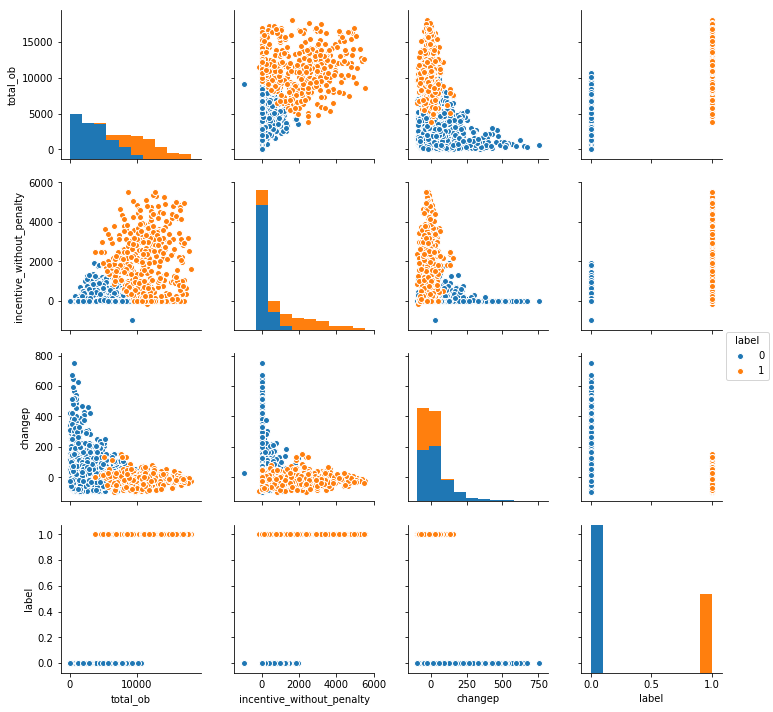

In [49]:
sns.pairplot(wk46_without_outliers.drop(['car_numb','city_login','eph','outliers'],axis=True),hue="label")

In [52]:
wk46_without_outliers.drop(['car_numb','city_login','eph','outliers'],axis=True).head()

,total_ob,incentive_without_penalty,changep,label
index,,,,
1,6395.70,0.00,-65.658606,0
2,4105.47,60.29,13.254807,0
3,262.63,0.00,5.333920,0
4,13535.50,1288.20,-32.632740,1
5,1943.76,334.40,-32.845143,0


In [53]:
wk47_without_outliers = wk47[wk47.outliers != -1]

In [54]:
wk47_without_outliers.head()

,car_numb,total_ob,incentive_without_penalty,city_login,eph,changep,outliers
index,,,,,,,
1,TS01UA2411,719.91,0.00,10.768889,66.850908,158.158791,1
2,TS01UA4308,3467.62,714.14,26.815278,155.946921,36.011809,1
3,TS01UA4945,275.57,0.00,12.644167,21.794240,21.268042,1
4,TS01UA6452,10220.51,1067.12,45.630278,247.371494,61.429119,1
5,TS01UA7585,5827.06,718.54,28.670833,228.301700,49.704985,1


In [55]:
scaler.fit(wk47_without_outliers.drop(['car_numb','city_login','eph','outliers'],axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [57]:
scaled_features = scaler.transform(wk47_without_outliers.drop(['car_numb','city_login','eph','outliers'],axis=1))

In [58]:
df_feat = pd.DataFrame(scaled_features,columns=['total_ob', 'incentive_without_penalty', 'changep'])

In [59]:
kmeans = KMeans(n_clusters=2)

In [60]:
kmeans.fit(df_feat)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [61]:
wk47_without_outliers["label"] = kmeans.labels_

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


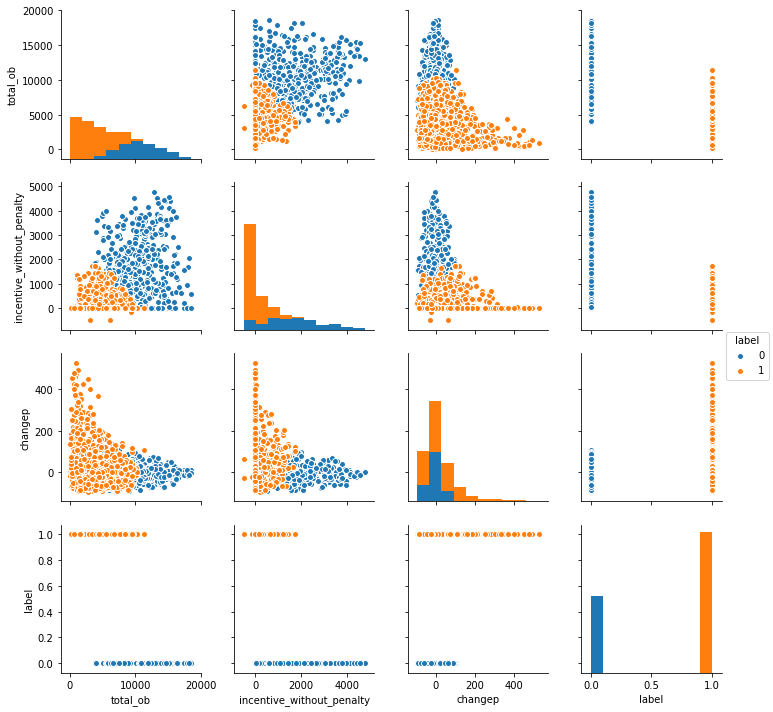

In [62]:
sns.pairplot(wk47_without_outliers.drop(['car_numb','city_login','eph','outliers'],axis=True),hue="label")

In [64]:
wk46_without_outliers["label"] = wk46_without_outliers["label"].map({0:"incentive_based",1:"ob_based"})

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [69]:
clf.fit(wk45.drop(["car_numb","city_login","eph"],axis=1))
y = clf.predict(wk45.drop(["car_numb","city_login","eph"],axis=1))
wk45["outliers"] = y
wk45_without_outliers = wk45[wk45.outliers != -1]
scaler.fit(wk45_without_outliers.drop(['car_numb','city_login','eph','outliers'],axis=1))
scaled_features = scaler.transform(wk45_without_outliers.drop(['car_numb','city_login','eph','outliers'],axis=1))

In [70]:
df_feat = pd.DataFrame(scaled_features,columns=['total_ob', 'incentive_without_penalty', 'changep'])

In [71]:
kmeans.fit(df_feat)
wk45_without_outliers["label"] = kmeans.labels_

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


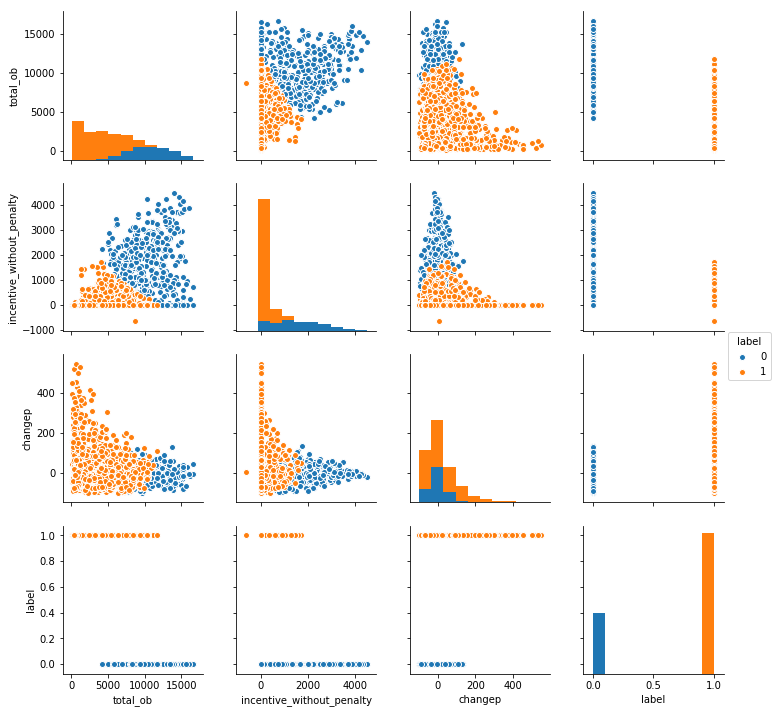

In [72]:
sns.pairplot(wk45_without_outliers.drop(['car_numb','city_login','eph','outliers'],axis=True),hue="label")

In [74]:
wk45_without_outliers["label"] = wk45_without_outliers["label"].map({1:"incentive_based",0:"ob_based"})

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [83]:
l = set(wk46_without_outliers["car_numb"]) & set(wk47_without_outliers["car_numb"])

In [88]:
wk46l = []
wk47l = []
for i in l:
    wk46l.append(wk46_without_outliers.loc[wk46_without_outliers.car_numb == i]["label"])
    wk47l.append(wk47_without_outliers.loc[wk47_without_outliers.car_numb == i]["label"])

In [104]:
len(range(0,1247))

1247

In [105]:
count = 0
for i in range(0,1246):
    if(wk46l[i].values[0] == wk47l[i].values[0]):
        count = count+1
print(count/1246)

0.7544141252006421


In [106]:
l = set(wk46_without_outliers["car_numb"]) & set(wk45_without_outliers["car_numb"])
len(l)

1258

In [107]:
wk46l = []
wk45l = []
for i in l:
    wk46l.append(wk46_without_outliers.loc[wk46_without_outliers.car_numb == i]["label"])
    wk45l.append(wk45_without_outliers.loc[wk45_without_outliers.car_numb == i]["label"])
count = 0
for i in range(0,1258):
    if(wk46l[i].values[0] == wk45l[i].values[0]):
        count = count+1
print(count/1246)

0.78330658105939


In [108]:
l = set(wk47_without_outliers["car_numb"]) & set(wk45_without_outliers["car_numb"])
len(l)

1243

In [109]:
wk47l = []
wk45l = []
for i in l:
    wk47l.append(wk47_without_outliers.loc[wk47_without_outliers.car_numb == i]["label"])
    wk45l.append(wk45_without_outliers.loc[wk45_without_outliers.car_numb == i]["label"])
count = 0
for i in range(0,1243):
    if(wk47l[i].values[0] == wk45l[i].values[0]):
        count = count+1
print(count/1246)

0.7287319422150883


In [123]:
templ = []
l = set(wk46_without_outliers["car_numb"]) & set(wk45_without_outliers["car_numb"])
wk46l = []
wk45l = []
for i in l:
    wk46l.append(wk46_without_outliers.loc[wk46_without_outliers.car_numb == i]["label"])
    wk45l.append(wk45_without_outliers.loc[wk45_without_outliers.car_numb == i]["label"])
count = 0
for i in range(0,1258):
    if(wk46l[i].values[0] == wk45l[i].values[0]):
        templ.append(wk46l[i].index[0])
        count = count+1
print(count/1246)

0.78330658105939


In [147]:
count

976

In [150]:
wk46.iloc[templ]["car_numb"].values

array(['TS01UA4308', 'TS01UA4945', 'TS01UA6452', 'TS01UA7585',
       'TS01UB4891', 'TS01UB6795', 'TS01UB6973', 'TS01UB7397',
       'TS02UA6401', 'TS02UB0454', 'TS02UB2966', 'TS02UB4074',
       'TS02UB4127', 'TS02UB4648', 'TS02UB5277', 'TS02UB5410',
       'TS02UB5516', 'TS02UB5599', 'TS02UB5644', 'TS02UB6285',
       'TS02UB6335', 'TS02UB6674', 'TS02UB6703', 'TS02UB7021',
       'TS02UC0605', 'TS02UC0939', 'TS03UA7252', 'TS03UA8292',
       'TS03UA8436', 'TS03UA8640', 'TS03UA8847', 'TS03UA9190',
       'TS03UA9206', 'TS03UA9364', 'TS03UA9877', 'TS03UA9927',
       'TS03UB0485', 'TS03UB1003', 'TS03UB1040', 'TS03UB1481',
       'TS03UB1572', 'TS03UB1605', 'TS03UB2127', 'TS03UB2528',
       'TS03UB2947', 'TS03UB3137', 'TS03UB3150', 'TS03UB3201',
       'TS03UB3334', 'TS03UB3577', 'TS03UB4013', 'TS03UB4464',
       'TS03UB5077', 'TS03UB5150', 'TS03UB5202', 'TS03UB5329',
       'TS03UB5497', 'TS03UB6071', 'TS03UB6144', 'TS03UB6224',
       'TS03UB6751', 'TS03UB7313', 'TS03UB7410', 'TS03U

In [152]:
tempdf = wk46_without_outliers.loc[wk46_without_outliers['car_numb'].isin(wk46.iloc[templ]["car_numb"].values)]

In [154]:
tempdf["label"].value_counts()

incentive_based    582
ob_based           305
Name: label, dtype: int64

In [159]:
wk46_without_outliers["label"] = wk46_without_outliers["label"].map({"incentive_based":"ob_based","ob_based":"incentive_based"})

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [160]:
wk46_without_outliers

,car_numb,total_ob,incentive_without_penalty,city_login,eph,changep,outliers,label
index,,,,,,,,
1,TS01UA2411,6395.70,0.00,31.358333,203.955355,-65.658606,1,ob_based
2,TS01UA4308,4105.47,60.29,23.676944,175.941622,13.254807,1,ob_based
3,TS01UA4945,262.63,0.00,12.003889,21.878743,5.333920,1,ob_based
4,TS01UA6452,13535.50,1288.20,67.733611,218.852941,-32.632740,1,incentive_based
5,TS01UA7585,1943.76,334.40,42.693611,53.360677,-32.845143,1,ob_based
6,TS01UB4778,7770.04,0.00,33.098333,234.756231,0.252614,1,ob_based
7,TS01UB4891,9957.54,3480.18,57.607222,233.264502,-69.923717,1,incentive_based
8,TS01UB6351,5898.19,0.00,32.654167,180.625954,3.863723,1,ob_based
9,TS01UB6795,11630.02,1118.91,61.979167,205.697022,28.074398,1,incentive_based


In [161]:
tempdf = wk46_without_outliers.loc[wk46_without_outliers['car_numb'].isin(wk46.iloc[templ]["car_numb"].values)]

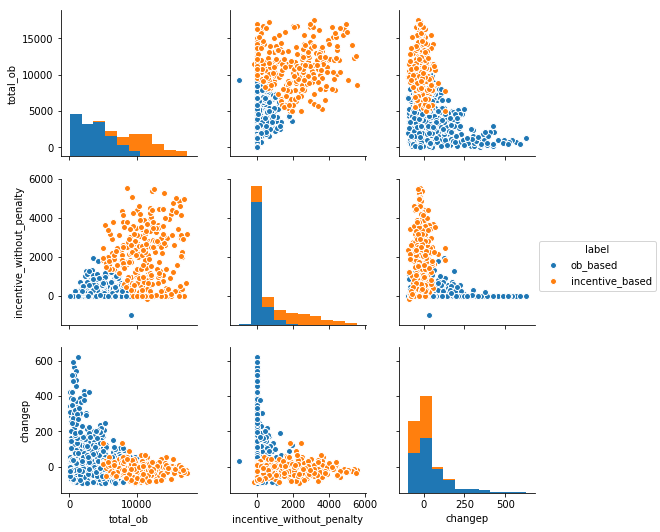

In [165]:
len(wk46.iloc[templ]["car_numb"].values)

976

In [170]:
tempdf.drop(["total_ob","incentive_without_penalty","city_login","eph","changep","outliers"],axis=1,inplace=True)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [173]:
writer = pd.ExcelWriter('output.xlsx')
tempdf.to_excel(writer,'Sheet1')
writer.save()